In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 # variable m is true mean 
    # and "mean" instance variable is our estimate of mean
#UPDATE function calculates the new mean based on the old mean and N
   

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [17]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print('True mean:')
    print(b.m)
    print('Estimate of mean:')
    print(b.mean)
    perror = 100*((b.m-b.mean)/b.m)
    print('Percent error:')
    print(perror)
    print('_________________________')
    

  return cumulative_average

In [6]:
#graghed on log scale to clearly see early fluctions

#Do the same experiment 3 times, with different epsilons 10%,5%,1%

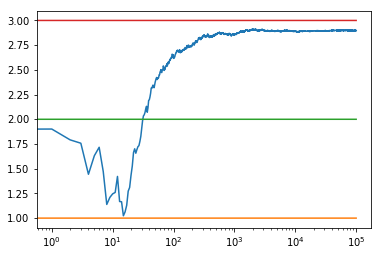

True mean:
1.0
Estimate of mean:
1.032419149171499
Percent error:
-3.2419149171498907
_________________________
True mean:
2.0
Estimate of mean:
2.001102615362745
Percent error:
-0.055130768137257036
_________________________
True mean:
3.0
Estimate of mean:
2.997754859458814
Percent error:
0.07483801803953583
_________________________


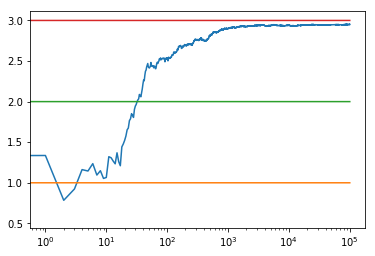

True mean:
1.0
Estimate of mean:
0.9412960471787265
Percent error:
5.870395282127349
_________________________
True mean:
2.0
Estimate of mean:
2.0173902756224185
Percent error:
-0.869513781120923
_________________________
True mean:
3.0
Estimate of mean:
2.9999805496297465
Percent error:
0.0006483456751175491
_________________________


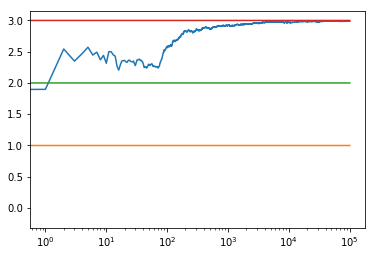

True mean:
1.0
Estimate of mean:
1.01374407216366
Percent error:
-1.3744072163659915
_________________________
True mean:
2.0
Estimate of mean:
2.035563815847778
Percent error:
-1.7781907923889007
_________________________
True mean:
3.0
Estimate of mean:
2.997637020854572
Percent error:
0.0787659715142682
_________________________


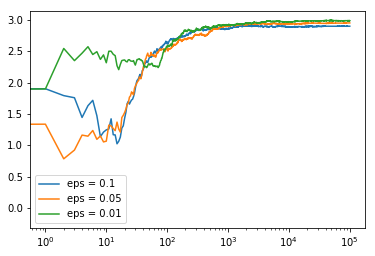

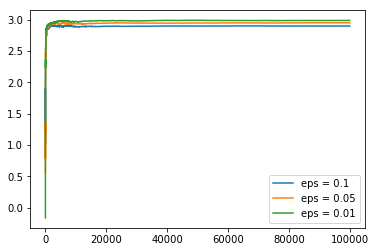

In [18]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()


# Lets explor other epsilon values

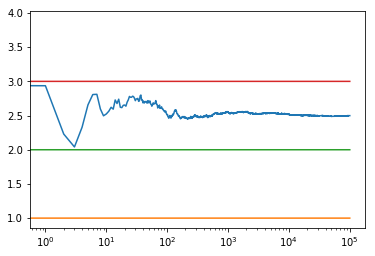

True mean:
1.0
Estimate of mean:
1.0034322568113994
Percent error:
-0.3432256811399359
_________________________
True mean:
2.0
Estimate of mean:
2.0028174495124613
Percent error:
-0.14087247562306615
_________________________
True mean:
3.0
Estimate of mean:
2.9945104024518803
Percent error:
0.18298658493732428
_________________________


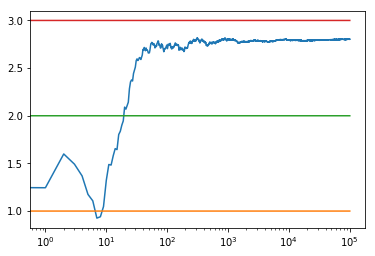

True mean:
1.0
Estimate of mean:
0.9860729028909532
Percent error:
1.3927097109046827
_________________________
True mean:
2.0
Estimate of mean:
1.996101823390429
Percent error:
0.19490883047854624
_________________________
True mean:
3.0
Estimate of mean:
3.0042420069841094
Percent error:
-0.14140023280364566
_________________________


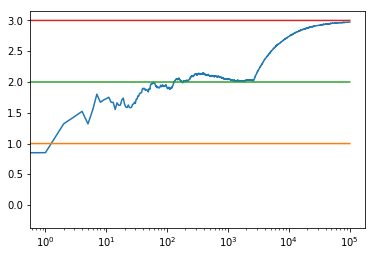

True mean:
1.0
Estimate of mean:
1.032092126874813
Percent error:
-3.209212687481311
_________________________
True mean:
2.0
Estimate of mean:
2.0225984526982845
Percent error:
-1.1299226349142266
_________________________
True mean:
3.0
Estimate of mean:
3.000005793807566
Percent error:
-0.0001931269188718924
_________________________


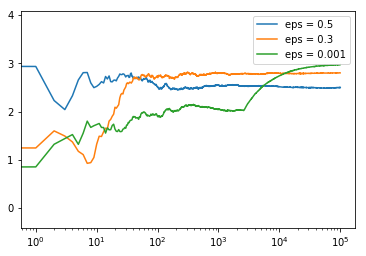

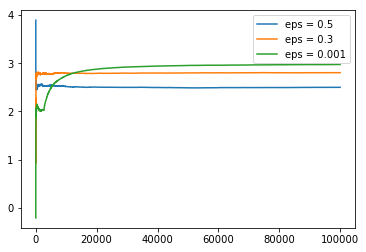

In [19]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.5, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.2, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.001, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.5')
  plt.plot(c_05, label='eps = 0.3')
  plt.plot(c_01, label='eps = 0.001')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.5')
  plt.plot(c_05, label='eps = 0.3')
  plt.plot(c_01, label='eps = 0.001')
  plt.legend()
  plt.show()

### The epsilon of .001 is worse at estimating the low reward bandits, but is very accurate for the highest bandit with an estimation of 3.000

# What if there are bigger rewards in the bandits? Rather than 1 , 2 , 3 what if they were 100, 50, 0.1

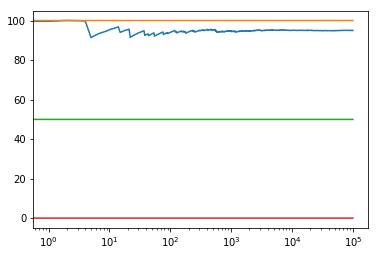

True mean:
100.0
Estimate of mean:
99.99799183150665
Percent error:
0.0020081684933472843
_________________________
True mean:
50.0
Estimate of mean:
49.999478263892165
Percent error:
0.0010434722156702492
_________________________
True mean:
0.1
Estimate of mean:
0.10396923262339558
Percent error:
-3.969232623395574
_________________________


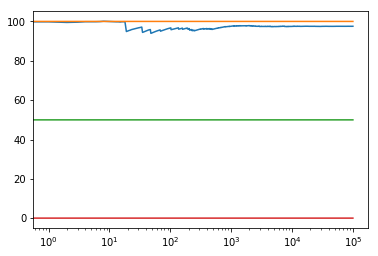

True mean:
100.0
Estimate of mean:
100.00272366545188
Percent error:
-0.0027236654518816295
_________________________
True mean:
50.0
Estimate of mean:
49.99754795003936
Percent error:
0.004904099921276384
_________________________
True mean:
0.1
Estimate of mean:
0.11359800637186732
Percent error:
-13.59800637186731
_________________________


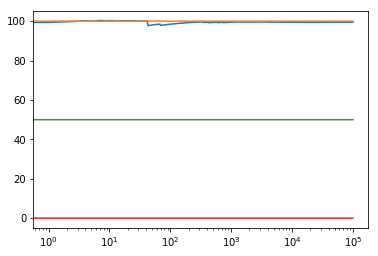

True mean:
100.0
Estimate of mean:
99.995506594976
Percent error:
0.004493405023993091
_________________________
True mean:
50.0
Estimate of mean:
49.986728280192054
Percent error:
0.026543439615892336
_________________________
True mean:
0.1
Estimate of mean:
0.006815688000855835
Percent error:
93.18431199914417
_________________________


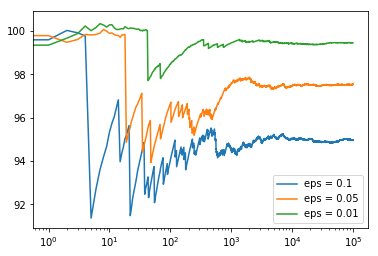

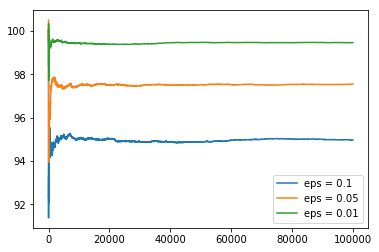

In [24]:
if __name__ == '__main__':
  c_1 = run_experiment(100.0, 50.0, 0.1, 0.1, 100000)
  c_05 = run_experiment(100.0,50.0, 0.1, 0.05, 100000)
  c_01 = run_experiment(100.0, 50.0, 0.1, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()


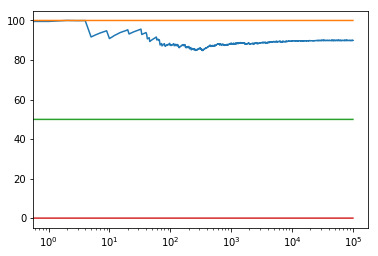

True mean:
100
Estimate of mean:
100.00264034159092
Percent error:
-0.002640341590918638
_________________________
True mean:
50
Estimate of mean:
49.99669502511162
Percent error:
0.006609949776759549
_________________________
True mean:
0.1
Estimate of mean:
0.10936497566459641
Percent error:
-9.364975664596404
_________________________


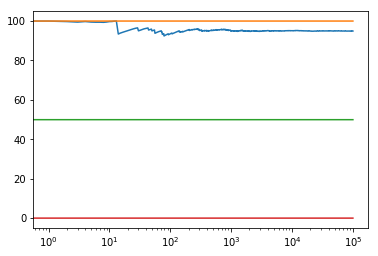

True mean:
100
Estimate of mean:
100.00252723302314
Percent error:
-0.002527233023144504
_________________________
True mean:
50
Estimate of mean:
50.00041169846743
Percent error:
-0.0008233969348623305
_________________________
True mean:
0.1
Estimate of mean:
0.08940635392033396
Percent error:
10.59364607966605
_________________________


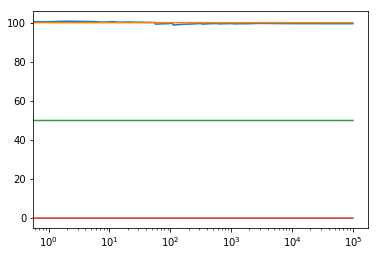

True mean:
100
Estimate of mean:
99.99978211481269
Percent error:
0.00021788518731113982
_________________________
True mean:
50
Estimate of mean:
50.08509712288484
Percent error:
-0.1701942457696788
_________________________
True mean:
0.1
Estimate of mean:
0.09186857270012827
Percent error:
8.131427299871735
_________________________


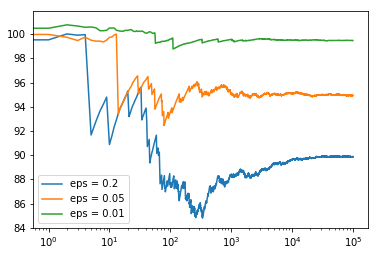

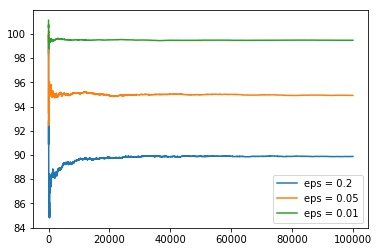

In [23]:
if __name__ == '__main__':
  c_1  = run_experiment(100, 50, 0.1, 0.2, 100000)
  c_05 = run_experiment(100, 50, 0.1, 0.1, 100000)
  c_01 = run_experiment(100, 50, 0.1, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.2')
  plt.plot(c_05, label='eps = 0.1')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.2')
  plt.plot(c_05, label='eps = 0.1')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

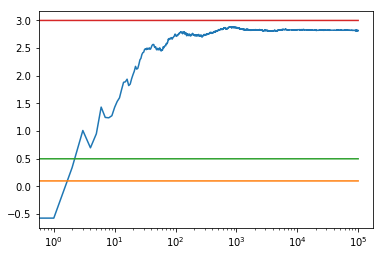

0.11638669209567079
-16.386692095670785
0.4868982002252608
2.6203599549478374
2.9998146670974766
0.006177763417447579


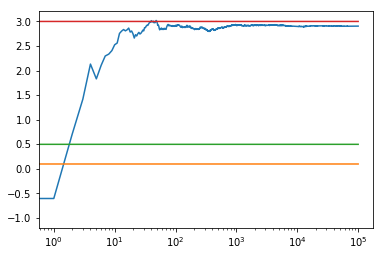

0.11109822378692429
-11.09822378692428
0.513646510929764
-2.7293021859527977
2.9962281521059895
0.12572826313368424


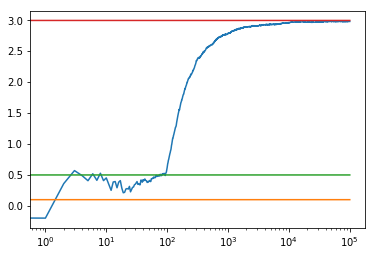

0.01862449696752876
81.37550303247124
0.4843803296408338
3.1239340718332453
3.0041558874482117
-0.13852958160705714


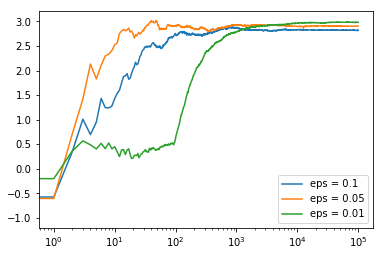

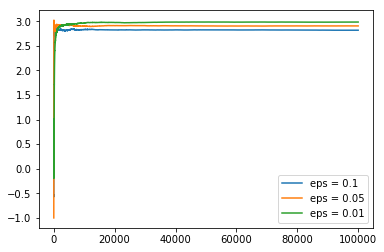

In [45]:
#what if bandit #3 had a signifacantly higher mean than the other two?
if __name__ == '__main__':
  c_1  = run_experiment(0.1, 0.5, 3.0, 0.1, 100000)
  c_05 = run_experiment(0.1, 0.5, 3.0, 0.05, 100000)
  c_01 = run_experiment(0.1, 0.5, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

The 1% epsilon had the most accurate convergence (closest to true max mean)

# OPTIMISTIC GREEDY

# What if we do not set the initial mean to zero...
## (remove epsilon and just be greedy)

In [37]:
class Bandit:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit #set to 10 in current run_experiment
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


#New overly optimisitc exeriment
def run_experiment(m1, m2, m3, N, upper_limit=100):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N)
  
  for i in range(N):
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print('True mean:')
    print(b.m)
    print('Estimate of mean:')
    print(b.mean)
    perror = 100*((b.m-b.mean)/b.m)
    print('Percent error:')
    print(perror)
    print('_________________________')
  return cumulative_average


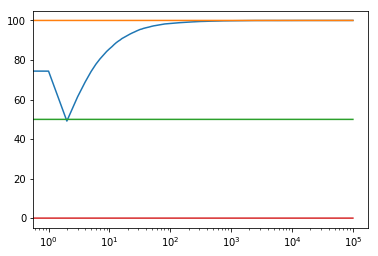

True mean:
100
Estimate of mean:
99.99955400954757
Percent error:
0.0004459904524338753
_________________________
True mean:
50
Estimate of mean:
74.73661689393569
Percent error:
-49.47323378787138
_________________________
True mean:
0.1
Estimate of mean:
49.362829963080415
Percent error:
-49262.82996308041
_________________________


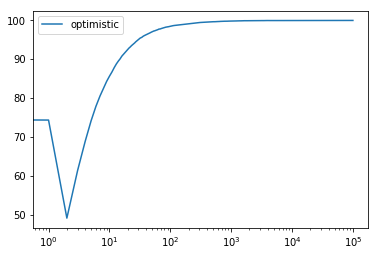

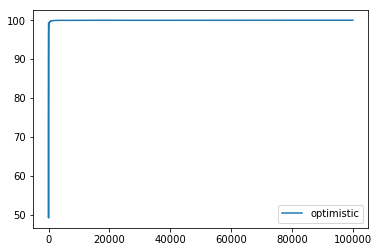

In [38]:
if __name__ == '__main__':
  oiv = run_experiment(100, 50, .1, 100000)

  # log scale plot
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()

## Earlier, the calculated cumulative average converged far below the true  mean with the bandit #3's calculated mean's %error being 0.1%

## Now, the agent is calculating a more accurate mean  with the bandit #3's calculated mean's %error being 0.05%

### Because we are only taking the greedy approach now, the percent error on the calculated means for bandits #1 and #2 have significant errors